# Gradient Descent (경사하강법) 시각화

## 목표
머신러닝의 핵심 학습 원리인 **경사하강법(Gradient Descent)**이 실제로 어떻게 동작하여 최적의 $W$(가중치)와 $b$(편향)를 찾아가는지 시각적으로 확인합니다.

## 학습 내용
1.  임의의 선형 데이터 ($y = 4x + 6$) 생성
2.  비용 함수(Cost Function) 정의 (MSE)
3.  경사하강법 직접 구현 및 실행
4.  학습 과정(Cost 감소, 회귀선 변화) 시각화

### 1. 데이터 생성
$y = 4x + 6$ 식을 따르는 데이터에 약간의 노이즈(Noise)를 더해 생성합니다.

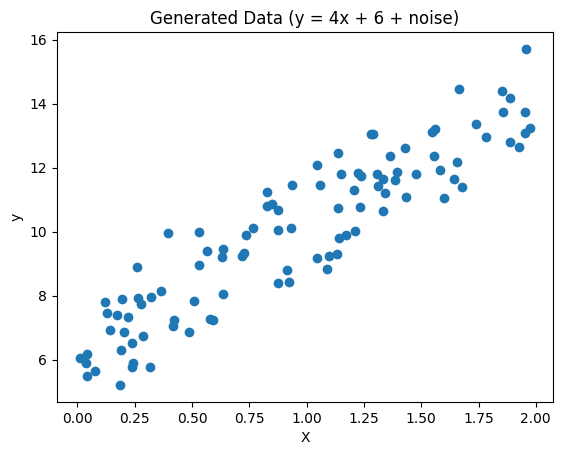

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# X: 0 ~ 2 사이의 임의의 값 100개
X = 2 * np.random.rand(100, 1)

# y: 4X + 6 + 노이즈
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data (y = 4x + 6 + noise)')
plt.show()

### 2. 비용 함수 (Cost Function)
평균 제곱 오차(MSE)를 계산하는 함수를 정의합니다.
$$ Cost(W, b) = \frac{1}{m} \sum_{i=1}^{m} (H(x^{(i)}) - y^{(i)})^2 $$

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

### 3. 경사하강법 구현 (Gradient Update)
현재 $W, b$에서의 기울기를 구해 업데이트하는 함수입니다.
$$ W \leftarrow W - \alpha \frac{\partial Cost}{\partial W} $$
$$ b \leftarrow b - \alpha \frac{\partial Cost}{\partial b} $$

In [3]:
def get_weight_updates(w, b, X, y, learning_rate=0.01):
    N = len(y)
    
    # 1. 예측값 구하기
    y_pred = np.dot(X, w) + b
    
    # 2. 차이(오차) 구하기
    diff = y - y_pred
    
    # 3. 기울기 계산 (행렬 연산 활용)
    # w_factors: X^T * (Actual - Pred)  (부호 주의: 미분 결과에 따라 -2/N 등 상수가 붙음)
    # 여기서는 일반적인 경사하강법 코드로 작성
    
    # 편미분 결과: -(2/N) * sum(x * (y - y_pred))
    w_factors = np.dot(X.T, diff)
    w_grad = -(2/N) * w_factors
    
    # 편미분 결과: -(2/N) * sum(y - y_pred)
    b_grad = -(2/N) * np.sum(diff)
    
    # 4. 파라미터 업데이트
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    
    return w, b

### 4. 학습 루프 실행 (Gradient Descent Steps)
반복 횟수(iters)만큼 경사하강법을 수행하며 $W, b$를 업데이트합니다.

In [4]:
def gradient_descent_steps(X, y, iters=1000, learning_rate=0.01):
    # 초기값 설정 (w=0, b=0)
    w = np.zeros((1, 1))
    b = 0
    
    for i in range(iters):
        w, b = get_weight_updates(w, b, X, y, learning_rate)
        if i % 100 == 0:
            y_pred = np.dot(X, w) + b
            cost = get_cost(y, y_pred)
            print(f"Epoch {i:4d}/{iters} | Cost: {cost:.4f} | W: {w[0][0]:.4f}, b: {b:.4f}")
            
    return w, b

# 학습 실행
w_final, b_final = gradient_descent_steps(X, y, iters=1000, learning_rate=0.01)
print(f"\n최종 결과: W={w_final[0][0]:.4f}, b={b_final:.4f}")
print("실제 정답: W=4, b=6")

Epoch    0/1000 | Cost: 97.2970 | W: 0.2150, b: 0.1995
Epoch  100/1000 | Cost: 1.3556 | W: 4.8617, b: 5.0646
Epoch  200/1000 | Cost: 1.1722 | W: 4.6687, b: 5.4308
Epoch  300/1000 | Cost: 1.0867 | W: 4.4765, b: 5.6496
Epoch  400/1000 | Cost: 1.0419 | W: 4.3365, b: 5.8074
Epoch  500/1000 | Cost: 1.0184 | W: 4.2351, b: 5.9217
Epoch  600/1000 | Cost: 1.0061 | W: 4.1616, b: 6.0045
Epoch  700/1000 | Cost: 0.9996 | W: 4.1084, b: 6.0645
Epoch  800/1000 | Cost: 0.9962 | W: 4.0698, b: 6.1079
Epoch  900/1000 | Cost: 0.9944 | W: 4.0419, b: 6.1394

최종 결과: W=4.0218, b=6.1620
실제 정답: W=4, b=6


### 5. 결과 시각화
최종 학습된 회귀선(빨간색)이 데이터(파란색)를 잘 표현하는지 확인합니다.

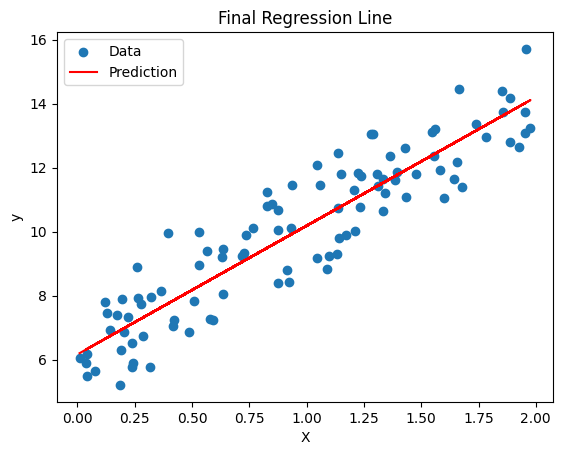

In [6]:
plt.scatter(X, y, label='Data')
plt.plot(X, w_final * X + b_final, 'r', label='Prediction')
plt.title('Final Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 5. 인사이트 도출 (Insights)

### 🌟 Key Takeaways
*   **경사 하강법**: 산에서 눈을 감고 가장 낮은 곳으로 내려가는 것처럼, 미분(기울기)을 이용해 오차가 최소가 되는 지점을 찾아가는 원리를 시각적으로 확인했습니다.
*   **학습률(Learning Rate)**: 보폭이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸린다는 교훈을 얻었습니다.

### 🔬 Try More
*   **학습률 실험**: Learning Rate를 `0.1`에서 `10.0`으로 아주 크게 키워보세요. 손실값(Cost)이 줄어들지 않고 폭발하는 것을 볼 수 있습니다.
